<a href="https://colab.research.google.com/github/DionesGouvea/Desafio_Atma/blob/main/Atma_word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort,reviews_all
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image 

In [3]:
#configurando Google Play Scrapper para o app da Atma 
hk_users_reviews = reviews_all(
'com.movile.meditation.vivo',
lang = 'pt'
)

In [4]:
df_reviews = pd.DataFrame(np.array(hk_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))

df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,a15890d3-9aa2-44c1-8395-c7f04785c2c7,Wellingtonhugg ser u Vicente,https://play-lh.googleusercontent.com/a/AEdFTp...,kkkkkk muito bom estala,5,0,4.7.0,2022-12-19 01:20:17,Olá! Agradecemos por sua avaliação.,2022-12-19 16:40:38
1,ac5ccace-ff11-42b0-9c8d-48ce677176e1,Carlos Reis,https://play-lh.googleusercontent.com/a-/AD5-W...,Muito legal e bom para relaxar.,5,0,4.7.0,2022-12-19 00:56:18,"Olá, Carlos! Ficamos muito felizes em saber qu...",2022-12-19 16:40:23
2,966f4b78-8778-45dd-9e56-712e812be3fc,Isabella Carvalho,https://play-lh.googleusercontent.com/a-/AD5-W...,"Gostaria de simplesmente utilizar o app, assim...",1,0,4.7.0,2022-12-18 21:52:12,"Olá, Isabella! Estamos aqui para lhe auxiliar ...",2022-12-19 13:47:03
3,e25ca352-680c-4846-8a13-03ec5e1b149c,Edilania Souza,https://play-lh.googleusercontent.com/a/AEdFTp...,e bom,1,0,4.7.0,2022-12-18 19:00:11,"Muito obrigada pelo feedback. No entanto, nota...",2022-12-19 13:43:55
4,d367b61d-54f4-449b-af47-bdd4dce8c484,Carlos Macedo,https://play-lh.googleusercontent.com/a/AEdFTp...,Não gostei; quero EXCLUIR esta conta e não est...,1,0,4.7.0,2022-12-18 12:47:32,"Olá, Carlos! Caso você seja um usuário que nun...",2022-12-19 13:46:19


In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6100 entries, 0 to 6099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              6100 non-null   object        
 1   userName              6100 non-null   object        
 2   userImage             6100 non-null   object        
 3   content               6100 non-null   object        
 4   score                 6100 non-null   int64         
 5   thumbsUpCount         6100 non-null   int64         
 6   reviewCreatedVersion  5459 non-null   object        
 7   at                    6100 non-null   datetime64[ns]
 8   replyContent          2298 non-null   object        
 9   repliedAt             2298 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 476.7+ KB


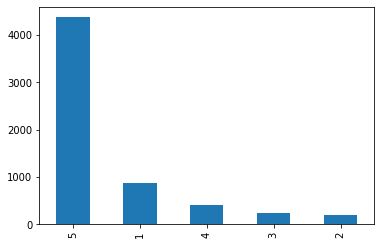

In [6]:
#distribuição das notas na play store 
df_reviews['score'].value_counts().plot(kind ='bar')

In [7]:
#fazendo um df apenas com as avaliação e notas. 
df_reviews_content= pd.DataFrame(df_reviews,columns =['content'])
df_reviews_content

,content
0,kkkkkk muito bom estala
1,Muito legal e bom para relaxar.
2,"Gostaria de simplesmente utilizar o app, assim..."
3,e bom
4,Não gostei; quero EXCLUIR esta conta e não est...
...,...
6095,"Fantástico, meditacões para cada momento. O ap..."
6096,"Excelente app, parabéns a Vivo por mais essa i..."
6097,Fantástico
6098,A Vivo sempre inovando e trazendo benefícios p...


In [29]:
wc = WordCloud(min_word_length=5) #instanciando o WC e colocando 5 para o minimo de letras 

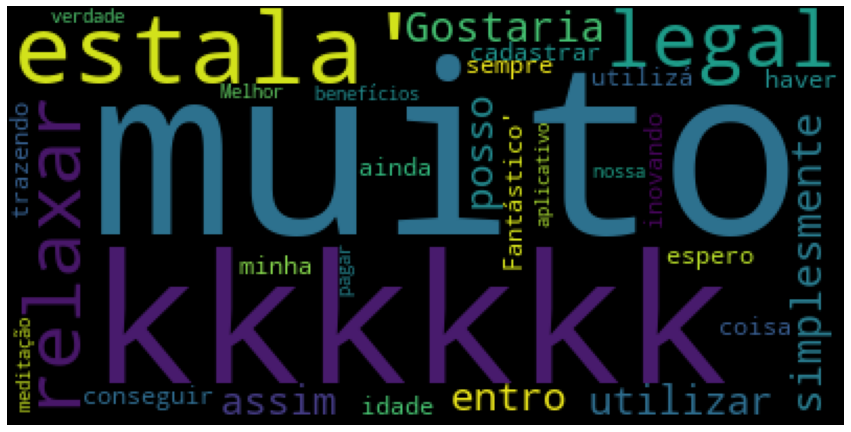

In [27]:
#WordCloud de todos os reviews feitos na playstore
text = df_reviews.content.values
wc.generate(str(text))
plt.figure(figsize = (15,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [32]:
#fazendo um df apenas com reviews com notas menor ou igual a 3 
df_bad_reviews= pd.DataFrame(df_reviews,columns =['content','score'])
df_bad_reviews = df_bad_reviews[df_bad_reviews['score'] <= 3]

df_bad_reviews.size

2618

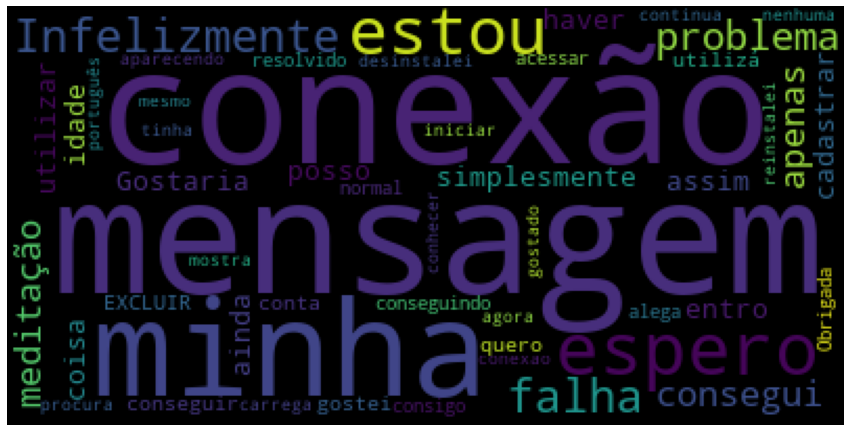

In [33]:
#WordCloud dos reviews com notas menor ou igual a 3 
text = df_bad_reviews.content.values
wc.generate(str(text))
plt.figure(figsize = (15,10))
plt.imshow(wc)
plt.axis("off")
plt.show()